# 🌲 Forest Cover Type Classification

## 📌 Task Overview
In this project, we predict the **type of forest cover** using cartographic and environmental features.  
The dataset used is **Covertype (UCI)**, which is a multi-class classification problem.  

## 🎯 Objectives
- Preprocess and clean the dataset
- Train and evaluate tree-based classification models (Random Forest, XGBoost)
- Visualize confusion matrix and feature importance
- Bonus: Perform hyperparameter tuning and model comparison


## Required Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Load DataSet

In [3]:
df = pd.read_csv('/kaggle/input/covertype-forest-cover-types/covertype.csv')
df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


In [4]:
correlation = df.corr(numeric_only=True)['Cover_Type'].sort_values(ascending=False)
print(correlation)

Cover_Type                            1.000000
Wilderness_Area                       0.323200
Soil_Type10                           0.243876
Soil_Type38                           0.160170
Soil_Type39                           0.155668
Unnamed: 2                            0.148285
Soil_Type40                           0.128351
Soil_Type2                            0.118135
Soil_Type6                            0.112958
Soil_Type4                            0.099672
Soil_Type1                            0.090828
Soil_Type17                           0.090582
Aspect                                0.081664
Soil_Type35                           0.080315
Soil_Type37                           0.080271
Soil_Type5                            0.077890
Soil_Type3                            0.068064
Horizontal_Distance_To_Fire_Points    0.066846
Soil_Type14                           0.065562
Soil_Type11                           0.035379
Soil_Type36                           0.025397
Soil_Type13  

correlation results show that Unnamed: 2 has a correlation of 0.148 with Cover_Type, which means it’s not just random noise—it carries some useful information for predicting the forest cover type.



In [5]:
df = df.rename(columns = {'Unnamed: 0': 'Feature_0' , 'Unnamed: 1': 'Feature_1' , 'Unnamed: 2': 'Feature_2'})

## Exploring the data

In [6]:
df.shape

(581012, 55)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Feature_0                           581012 non-null  int64
 1   Feature_1                           581012 non-null  int64
 2   Feature_2                           581012 non-null  int64
 3   Elevation                           581012 non-null  int64
 4   Aspect                              581012 non-null  int64
 5   Slope                               581012 non-null  int64
 6   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 7   Vertical_Distance_To_Hydrology      581012 non-null  int64
 8   Horizontal_Distance_To_Roadways     581012 non-null  int64
 9   Hillshade_9am                       581012 non-null  int64
 10  Hillshade_Noon                      581012 non-null  int64
 11  Hillshade_3pm                       581012 non-null 

In [8]:
df.describe()

,Feature_0,Feature_1,Feature_2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


## 🧹 Data Preprocessing
- Handle missing values (if any)
- Convert categorical variables (e.g., Wilderness_Area, Soil_Type)
- Split data into features (X) and target (y)
- Normalize or scale continuous features if needed

In [9]:
df.isnull().sum()

Feature_0                             0
Feature_1                             0
Feature_2                             0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area                       0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


## Feature-target split

In [10]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

### 📊 Class Distribution Check
Before applying classification models, we check the distribution of the target variable `Cover_Type`.  
Imbalanced datasets can bias the model toward majority classes. If imbalance is detected, we will apply class weights or resampling methods.


In [11]:
print(y.value_counts())
print(y.value_counts(normalize=True) * 100)

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64
Cover_Type
2    48.759922
1    36.460521
3     6.153746
7     3.530048
6     2.989095
5     1.633873
4     0.472796
Name: proportion, dtype: float64


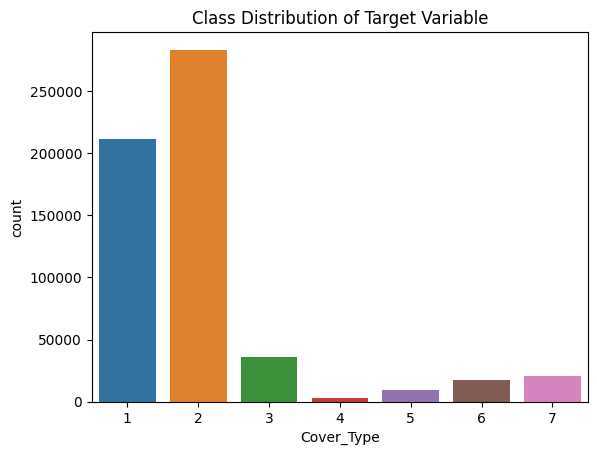

In [12]:
sns.countplot(x=y)
plt.title("Class Distribution of Target Variable")
plt.show()

## class distribution for Cover_Type clearly shows imbalance:

Class 2: ~48.8% of the data

Class 1: ~36.5% of the data

Class 4: less than 0.5% of the data

This means the model could easily favor classes 1 and 2 while ignoring minority classes (4, 5, 6, 7), leading to high accuracy but poor recall for rare classes.



## Train-test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Handling Class Imbalance In Random Forest

The dataset shows class imbalance among the 7 forest cover types.  
To address this, we:
1. Used `class_weight='balanced'` in Random Forest to adjust misclassification penalties.
2. Compared macro metrics (precision, recall, F1) instead of accuracy alone.

 ## Model Training Random Forest

In [14]:
rf = RandomForestClassifier(n_estimators = 200 , random_state = 42 , class_weight = 'balanced')
rf.fit(X_train , y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

## Model Prediction

In [15]:
y_pred_rf = rf.predict(X_test)

## 📊 Model Evaluation Metrics

We evaluate the Random Forest model using multi-class metrics:
- **Accuracy**: Overall percentage of correctly classified samples.
- **Precision (Macro)**: Average precision across all classes.
- **Recall (Macro)**: Average recall (sensitivity) across all classes.
- **F1 Score (Macro)**: Harmonic mean of precision and recall across classes.

In [16]:
print(metrics.classification_report(y_test , y_pred_rf))

              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.91      0.85      0.88       549
           5       0.95      0.79      0.86      1899
           6       0.94      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



In [17]:
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
precision_rf = metrics.precision_score(y_test, y_pred_rf, average='macro')
recall_rf = metrics.recall_score(y_test, y_pred_rf, average='macro')
F1_score_rf = metrics.f1_score(y_test, y_pred_rf, average='macro')

print({
    "Accuracy": accuracy_rf,
    "Precision (Macro)": precision_rf,
    "Sensitivity/Recall (Macro)": recall_rf,
    "F1 Score (Macro)": F1_score_rf
})

{'Accuracy': 0.9550786124282505, 'Precision (Macro)': 0.9460982737347926, 'Sensitivity/Recall (Macro)': 0.9085028797561466, 'F1 Score (Macro)': 0.9259664847786178}


In [18]:
results_df = pd.DataFrame({
    'Actual Cover Type': y_test.reset_index(drop=True),
    'Predicted Cover Type': y_pred_rf
})

results_df.head(10)

,Actual Cover Type,Predicted Cover Type
0,1,1
1,3,3
2,2,2
3,3,3
4,1,1
5,6,3
6,1,1
7,1,1
8,2,2
9,2,2


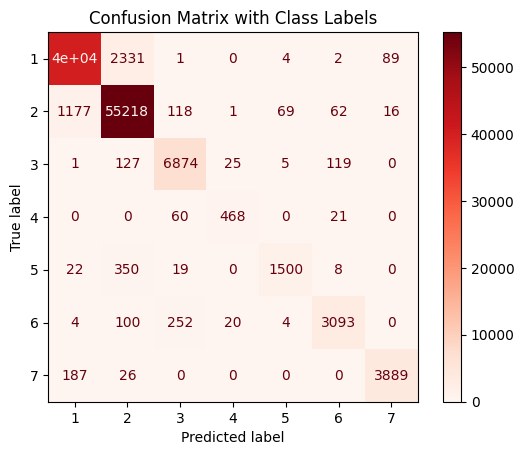

In [19]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf, labels=[1, 2, 3, 4, 5, 6, 7])

# Display with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5, 6, 7])
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix with Class Labels")
plt.show()

## 🔧 Hyperparameter Tuning

We use `GridSearchCV` to optimize hyperparameters for XGBoost:

- **XGBoost**:
  - `n_estimators`
  - `max_depth`
  - `learning_rate`

Cross-validation (`cv=3`) is used to evaluate parameter combinations and select the best-performing configuration.


## ⚠️ Adjusting Labels for XGBoost

XGBoost requires class labels to start from 0.  
Since our `Cover_Type` classes range from 1 to 7, we subtract 1 from the labels before training and add 1 back to predictions.

In [20]:
# Shift class labels to start from 0
y_train_adj = y_train - 1
y_test_adj = y_test - 1

In [21]:
param_grid_xgb = {
    'n_estimators' : [500],
    'max_depth' : [4, 6],
    'learning_rate': [0.05, 0.1, 0.3, 0.5, 1]
}

grid_search = GridSearchCV(XGBClassifier(random_state = 42), param_grid_xgb , cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train_adj)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 1, 'max_depth': 6, 'n_estimators': 500}
Best score:  0.9567779455204534


## Handling Class Imbalance in XGBoost

To handle imbalanced classes, we assign higher weights to samples of minority classes.  
XGBoost uses the `sample_weight` parameter during training to give these samples more importance.  

**Steps:**
1. Calculate class weights based on class frequencies.
2. Create an array of weights for each training sample.
3. Train XGBoost using `sample_weight`.

In [22]:
# Compute class weights
classes = np.unique(y_train_adj)
weights = compute_class_weight('balanced' , classes = classes , y = y_train_adj)
weights

array([ 0.39181272,  0.29298132,  2.32147976, 30.20986611,  8.74391437,
        4.77913385,  4.04688479])

In [23]:
weight_dict = dict(zip(classes,weights))
weight_dict

{0: 0.39181272253992233,
 1: 0.29298131712974634,
 2: 2.3214797648598298,
 3: 30.209866112049916,
 4: 8.743914368486399,
 5: 4.779133850171708,
 6: 4.046884794873581}

In [24]:
# Assign sample weights
sample_weights = np.array([weight_dict[label] for label in y_train_adj])

## Model Training XGBoost

In [25]:
xgb = XGBClassifier(n_estimators=500, max_depth=6, learning_rate=1 , random_state = 42)
xgb.fit(X_train, y_train_adj , sample_weight = sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [26]:
y_pred_xgb = xgb.predict(X_test) + 1

In [27]:
print(classification_report(y_test , y_pred_xgb))

              precision    recall  f1-score   support

           1       0.96      0.96      0.96     42368
           2       0.97      0.96      0.97     56661
           3       0.96      0.97      0.96      7151
           4       0.89      0.89      0.89       549
           5       0.88      0.94      0.91      1899
           6       0.93      0.95      0.94      3473
           7       0.96      0.98      0.97      4102

    accuracy                           0.96    116203
   macro avg       0.94      0.95      0.94    116203
weighted avg       0.96      0.96      0.96    116203



In [28]:
accuracy_xgb = metrics.accuracy_score(y_test, y_pred_xgb)
precision_xgb = metrics.precision_score(y_test, y_pred_xgb, average='macro')
recall_xgb = metrics.recall_score(y_test, y_pred_xgb, average='macro')
F1_score_xgb = metrics.f1_score(y_test, y_pred_xgb, average='macro')

print({
    "Accuracy": accuracy_xgb,
    "Precision (Macro)": precision_xgb,
    "Sensitivity/Recall (Macro)": recall_xgb,
    "F1 Score (Macro)": F1_score_xgb
})

{'Accuracy': 0.9613607221844531, 'Precision (Macro)': 0.9362601287698565, 'Sensitivity/Recall (Macro)': 0.9483151588979615, 'F1 Score (Macro)': 0.9421613195219776}


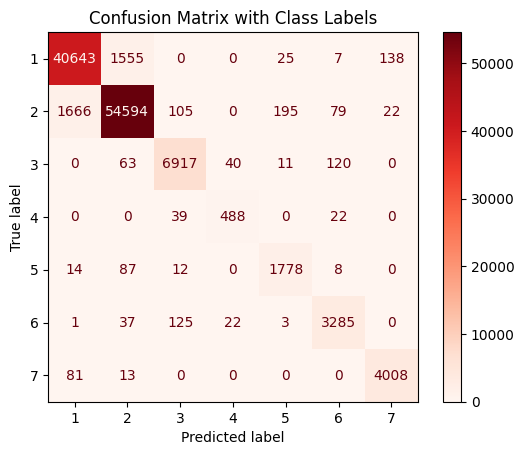

In [29]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb, labels=[1, 2, 3, 4, 5, 6, 7])

# Display with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5, 6, 7])
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix with Class Labels")
plt.show()

## Feature Importance Visualization

In [30]:
# Get feature importances
rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# Get feature importances
xgb_importances = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

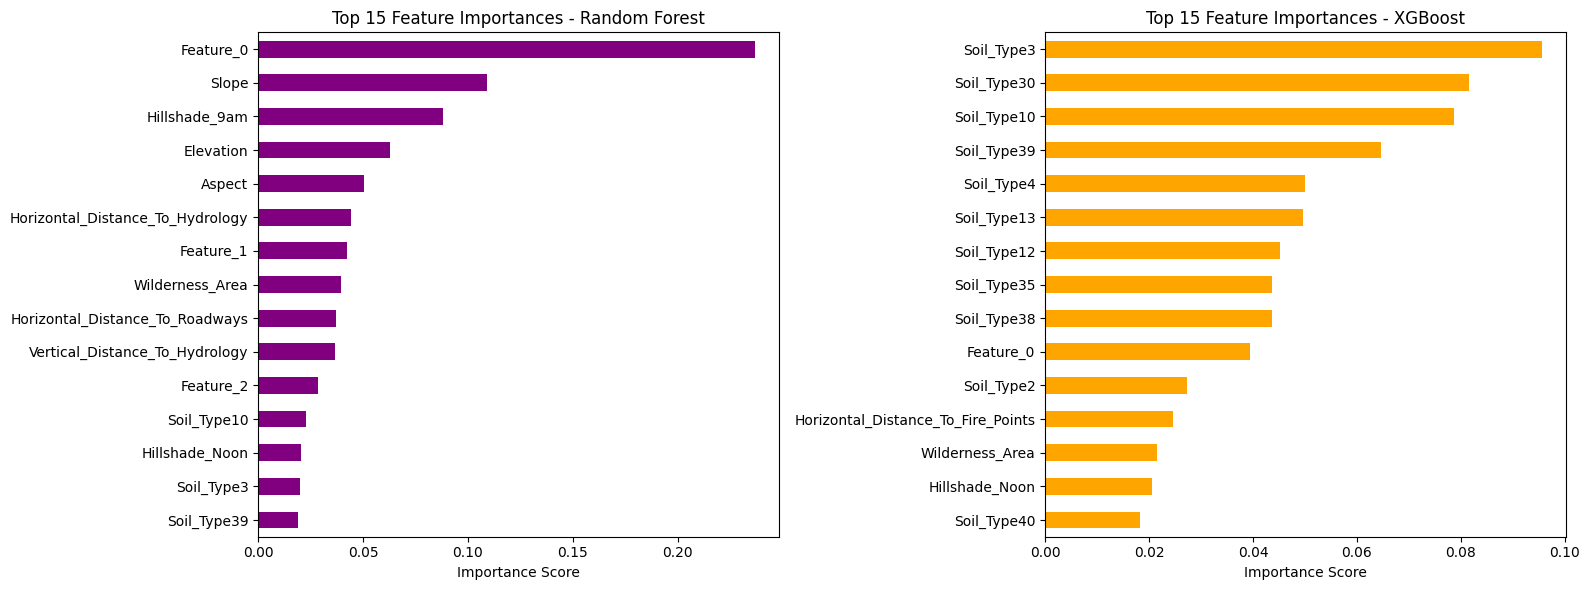

In [31]:
fig , axes = plt.subplots(1,2, figsize = (16,6))

rf_importances.head(15).sort_values().plot(kind = 'barh' , color = 'purple' , ax = axes[0])

axes[0].set_title("Top 15 Feature Importances - Random Forest")
axes[0].set_xlabel("Importance Score")

xgb_importances.head(15).sort_values().plot(kind = 'barh' , color = 'orange' , ax = axes[1])
axes[1].set_title("Top 15 Feature Importances - XGBoost")
axes[1].set_xlabel("Importance Score")

plt.tight_layout()
plt.show()

In [32]:
metrics_comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1_Score"],
    "Random Forest": [
        accuracy_rf,precision_rf,recall_rf,F1_score_rf
    ],
    "XGBoost": [
        accuracy_xgb,precision_xgb,recall_xgb,F1_score_xgb

    ]
})
metrics_comparison

,Metric,Random Forest,XGBoost
0,Accuracy,0.955079,0.961361
1,Precision,0.946098,0.936260
2,Recall,0.908503,0.948315
3,F1_Score,0.925966,0.942161


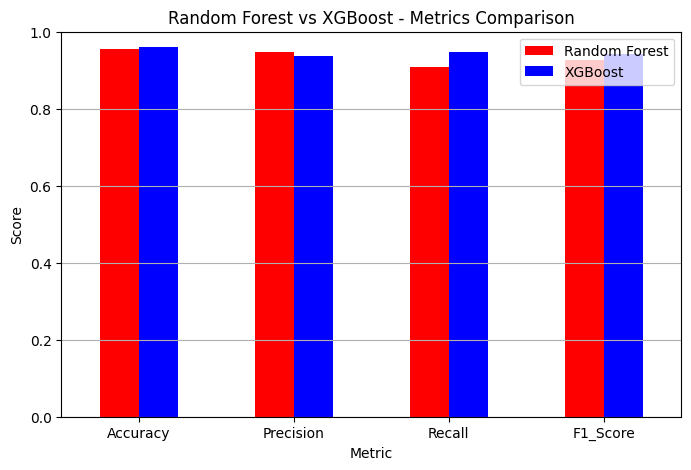

In [33]:
metrics_comparison.set_index("Metric").plot(
    kind='bar', figsize=(8, 5), color=["red", "blue"]
)
plt.title("Random Forest vs XGBoost - Metrics Comparison")
plt.ylabel("Score")
plt.ylim(0, 1) 
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()